In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import datetime as dt

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import scipy as sp


## Exploratory Data Analysis(EDA)

In [2]:
df = pd.read_csv('final_dataset.csv')

C:\Users\z004ymcy\AppData\Local\Temp\ipykernel_14516\4240546656.py:1: DtypeWarning: Columns (8,17,18,20,31,32,33,42,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('final_dataset.csv')


In [3]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Longitude,Location,Resolution_Time,Day of Week,Day of Month,Month,Year,Storm_Borough,BEGIN_TIME,EVENT_TYPE
0,62618855,2024-09-30 11:34:12,2024-09-30 11:34:12,DOB,Department of Buildings,Building/Use,Illegal Conversion Of Residential Building/Space,NaN,11219.0,1071 65 STREET,...,-74.006690,"(40.629115019847006, -74.00669006815433)",0,0,30,9,2024,NaN,NaN,NaN
1,62608311,2024-09-30 11:31:35,2024-09-30 11:32:06,DPR,Department of Parks and Recreation,Maintenance or Facility,Garbage or Litter,Street/Curbside,10457.0,CROTONA PARK,...,-73.895272,"(40.83799273965483, -73.89527182764397)",0,0,30,9,2024,NaN,NaN,NaN
2,62617195,2024-09-30 11:31:11,2024-09-30 11:31:11,DOB,Department of Buildings,General Construction/Plumbing,Cons - Contrary/Beyond Approved Plans/Permits,NaN,11377.0,41-24 51 STREET,...,-73.913527,"(40.74533475364905, -73.913526986578)",0,0,30,9,2024,NaN,NaN,NaN
3,62609038,2024-09-30 11:30:15,2024-09-30 11:33:18,NYPD,New York City Police Department,Drug Activity,Use Outside,Street/Sidewalk,11365.0,71-01 PARSONS BOULEVARD,...,-73.810908,"(40.73009934988612, -73.81090754397326)",0,0,30,9,2024,NaN,NaN,NaN
4,62618479,2024-09-30 11:29:54,2024-09-30 11:33:06,NYPD,New York City Police Department,Drug Activity,Use Outside,Street/Sidewalk,11432.0,166-11 HILLSIDE AVENUE,...,-73.796224,"(40.70959010805712, -73.79622399678361)",0,0,30,9,2024,NaN,NaN,NaN


In [4]:
df_normal = df[df["Storm_Borough"].isnull()]
df_normal.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Longitude,Location,Resolution_Time,Day of Week,Day of Month,Month,Year,Storm_Borough,BEGIN_TIME,EVENT_TYPE
0,62618855,2024-09-30 11:34:12,2024-09-30 11:34:12,DOB,Department of Buildings,Building/Use,Illegal Conversion Of Residential Building/Space,NaN,11219.0,1071 65 STREET,...,-74.006690,"(40.629115019847006, -74.00669006815433)",0,0,30,9,2024,NaN,NaN,NaN
1,62608311,2024-09-30 11:31:35,2024-09-30 11:32:06,DPR,Department of Parks and Recreation,Maintenance or Facility,Garbage or Litter,Street/Curbside,10457.0,CROTONA PARK,...,-73.895272,"(40.83799273965483, -73.89527182764397)",0,0,30,9,2024,NaN,NaN,NaN
2,62617195,2024-09-30 11:31:11,2024-09-30 11:31:11,DOB,Department of Buildings,General Construction/Plumbing,Cons - Contrary/Beyond Approved Plans/Permits,NaN,11377.0,41-24 51 STREET,...,-73.913527,"(40.74533475364905, -73.913526986578)",0,0,30,9,2024,NaN,NaN,NaN
3,62609038,2024-09-30 11:30:15,2024-09-30 11:33:18,NYPD,New York City Police Department,Drug Activity,Use Outside,Street/Sidewalk,11365.0,71-01 PARSONS BOULEVARD,...,-73.810908,"(40.73009934988612, -73.81090754397326)",0,0,30,9,2024,NaN,NaN,NaN
4,62618479,2024-09-30 11:29:54,2024-09-30 11:33:06,NYPD,New York City Police Department,Drug Activity,Use Outside,Street/Sidewalk,11432.0,166-11 HILLSIDE AVENUE,...,-73.796224,"(40.70959010805712, -73.79622399678361)",0,0,30,9,2024,NaN,NaN,NaN


### Exploring over the type of complaints in New York

<Axes: title={'center': 'Top Complaints'}, xlabel='Complaint Type'>

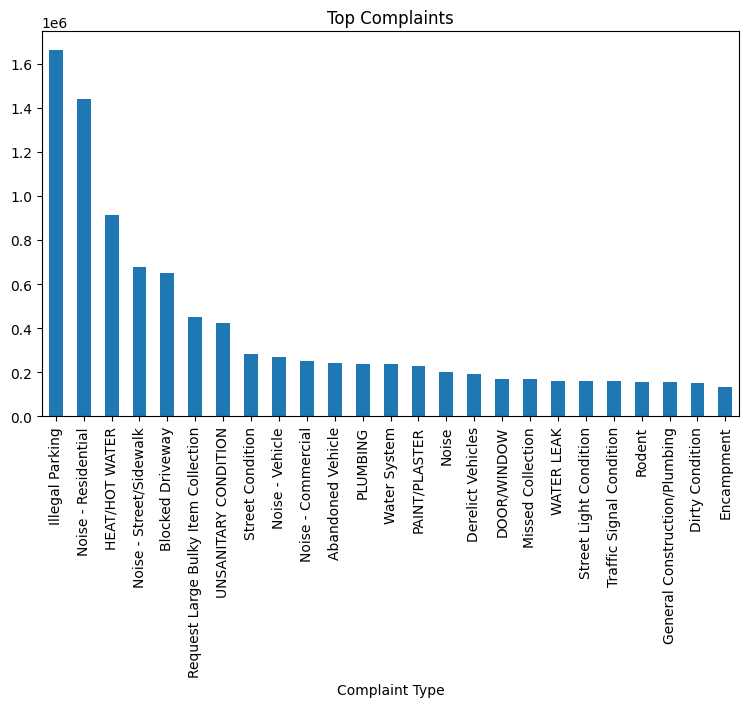

In [5]:
top_complains = (df_normal['Complaint Type'].value_counts()).head(25)
top_complains.plot(kind='bar', figsize=(9,5), title = 'Top Complaints')

<Axes: title={'center': 'Least frequent Complaints'}, xlabel='Complaint Type'>

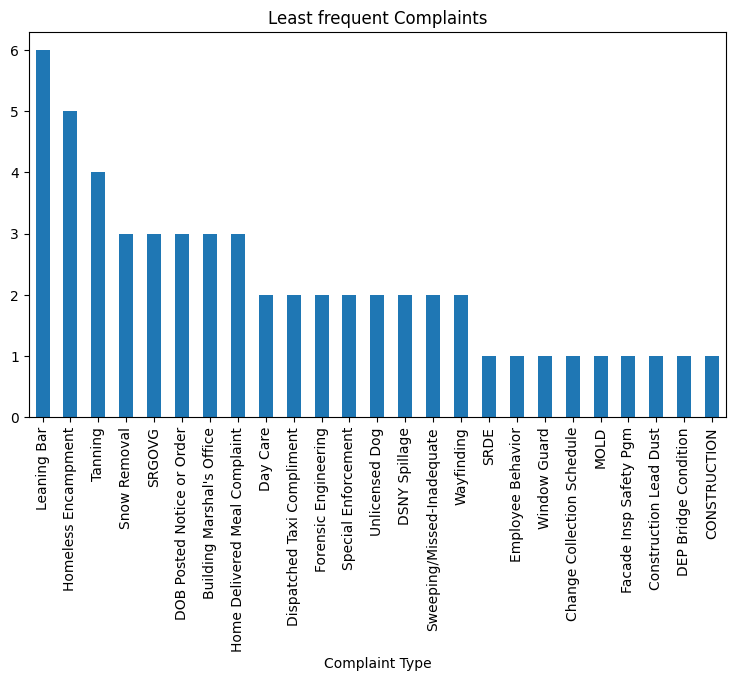

In [6]:
least_complains = (df_normal['Complaint Type'].value_counts()).tail(25)
least_complains.plot(kind='bar',figsize=(9,5),  title = 'Least frequent Complaints')

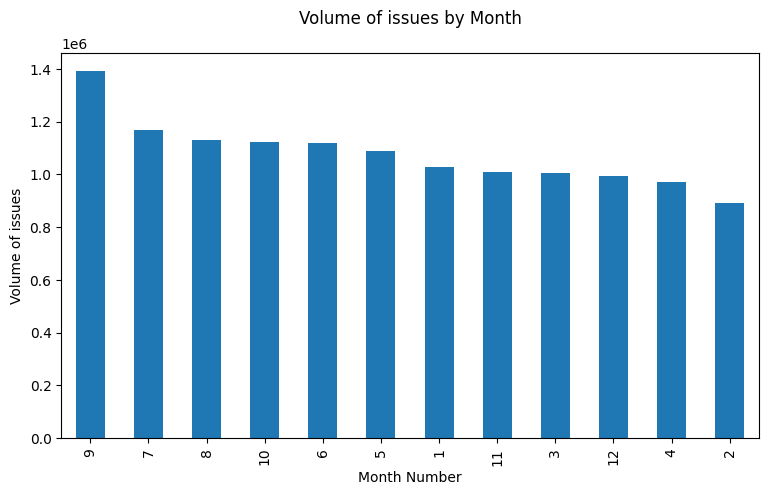

In [7]:
# df_heat = df[df["Complaint Type"] == "Noise - Residential"]
df_normal['Month'].value_counts().plot(kind = 'bar',
                                               figsize = (9,5),
                                               title = 'Volume of issues by Month\n')
plt.xlabel('Month Number')
plt.ylabel('Volume of issues')
plt.show()

Most complaints come from May through October.

## Exploring the geography of spread of quality of air in NewYork 

In [8]:
df_AirQuality = df_normal[df_normal['Complaint Type'] == 'Air Quality']
#df_AirQuality.plot(kind='hexbin', x = 'Longitude', y = 'Latitude', gridsize = 40, colormap = 'jet', mincnt = 1, title = 'Air Quality issues across NYC\n', figsize = (10,6)).axis('equal')

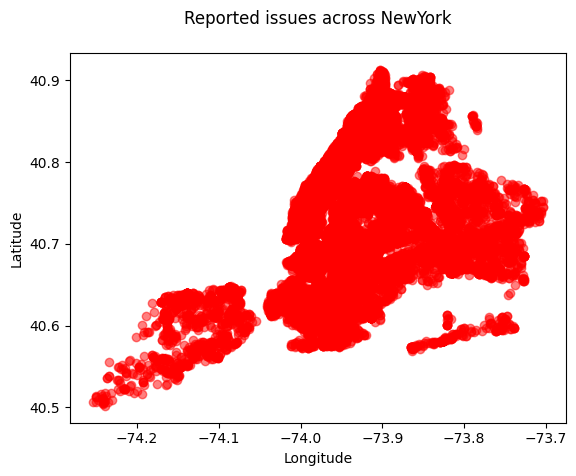

In [9]:
plt.scatter(df_AirQuality['Longitude'], df_AirQuality['Latitude'], color = 'red', alpha = 0.5)
plt.title('Reported issues across NewYork\n')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### Complaint distribution across Boroughs

<Axes: title={'center': 'Number of complaints distribution across Boroughs\n'}, ylabel='count'>

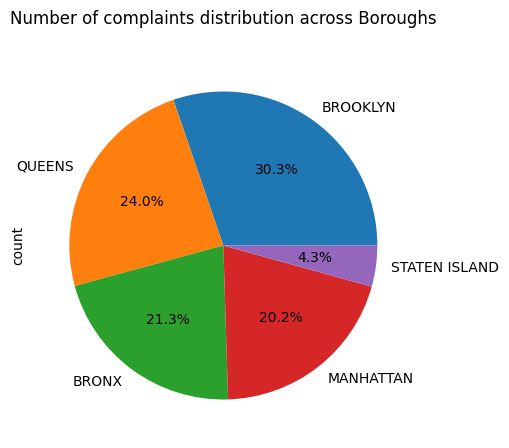

In [10]:
df_normal = df_normal[df_normal['Borough'] != "Unspecified"]
df_normal['Borough'].value_counts().plot(kind = 'pie', 
                                  autopct='%1.1f%%', 
                                  figsize=(9,5), 
                                  title = 'Number of complaints distribution across Boroughs\n')

Avg Resolution Time (Days):  25.40121651792118


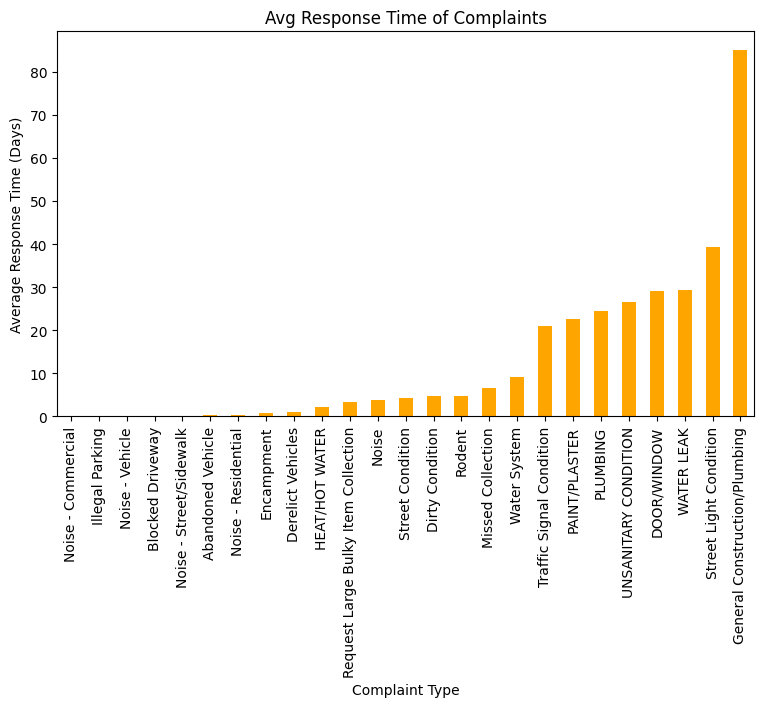

In [11]:
plt.figure()

print("Avg Resolution Time (Days): ", df_normal["Resolution_Time"].mean())

avgrstm_ct = df_normal.groupby('Complaint Type').Resolution_Time.mean()
avgrstm_ct = avgrstm_ct.sort_values(ascending=False)
top_complains = df_normal['Complaint Type'].value_counts().head(25)
avgrstm_ct = avgrstm_ct.loc[top_complains.index]
avgrstm_ct.sort_values(ascending=True).plot(kind = 'bar',
                  figsize = (9,5),
                  color = "orange",
                  title = 'Avg Response Time of Complaints')
plt.xlabel('Complaint Type')
plt.ylabel('Average Response Time (Days)')
plt.show()

We see that, generally, noise and illegal parking issues are resolved on the same day; while issues like unsanitary conditions and plumbing take relatively long times to resolve.

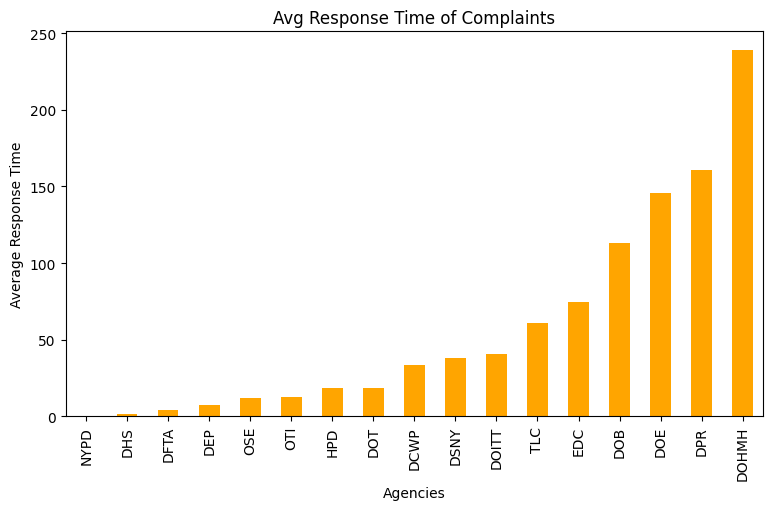

In [12]:
plt.figure()
avgrstm_ag = df_normal.groupby('Agency').Resolution_Time.mean()
agency = df_normal['Agency'].value_counts().head(25)
avgrstm_ag = avgrstm_ag.loc[agency.index]
avgrstm_ag.sort_values(ascending=True).plot(kind = 'bar',
                  figsize = (9,5),
                  color = "orange",
                  title = 'Avg Response Time of Complaints')
plt.xlabel('Agencies')
plt.ylabel('Average Response Time')
plt.show()

From the above graph we can conclude that NYPD and DHS are the most efficient agencies with the least avg response time. These are also the agencies which generally solve the most number of complaints.

<Axes: title={'center': 'Location Type vs Number of Complaints'}, xlabel='Location Type'>

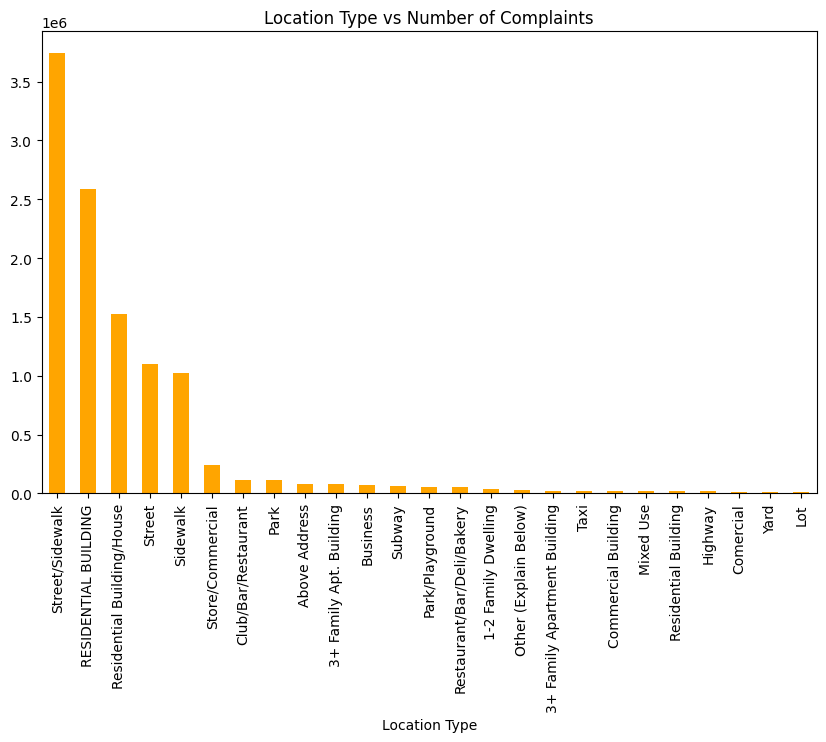

In [13]:
(df_normal['Location Type'].value_counts()).head(25).plot(kind = 'bar', 
                                                             figsize = (10,6),
                                                             color = "orange",
                                                             title = 'Location Type vs Number of Complaints')

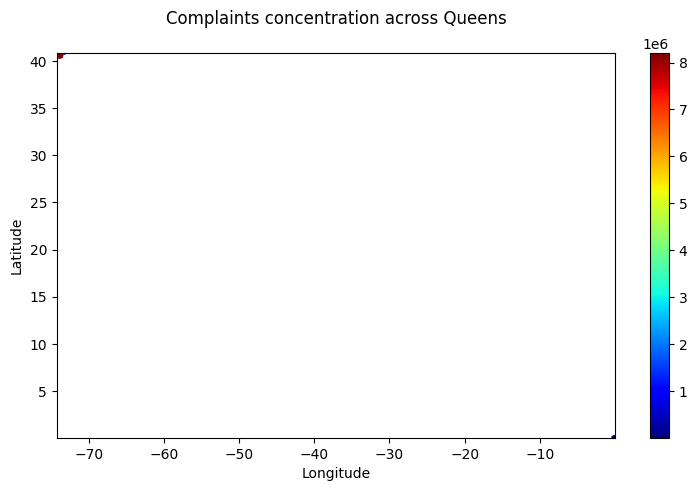

In [14]:
ax = df_normal.plot(kind='hexbin', 
                    x='Longitude', 
                    y='Latitude',
                    colormap='jet',
                    mincnt=1,
                    title='Complaints concentration across Queens\n', 
                    figsize=(9, 5))

# Set the aspect ratio to equal
# ax.axis('equal')

# Set the limits of the axes to cover all points
ax.set_xlim(df_normal['Longitude'].min(), df_normal['Longitude'].max())
ax.set_ylim(df_normal['Latitude'].min(), df_normal['Latitude'].max())

plt.show()

### Predicting the resolution time for Street issues

In [15]:
totalnull = df_normal.isnull().sum()
totaldistinct = df_normal.nunique(dropna = True)
output_data = pd.DataFrame({'Null':totalnull, 'Distinct':totaldistinct}) 
output_data

,Null,Distinct
Unique Key,0,12896974
Created Date,0,10361759
Closed Date,0,8675981
Agency,0,17
Agency Name,0,18
Complaint Type,0,257
Descriptor,346709,1227
Location Type,1687946,205
Incident Zip,166746,614
Incident Address,512106,1069389


A function to extract the features for the model. The features chosen from the dataset are based on intuition. The descriptor variable is broken into dummy variables so that it can be converted into categorical data. Similarly Incident Zip column is manipulated for bringing down the scale of column.

In [16]:
def buildFeatures(dataset):
    df_features = dataset.filter(['Descriptor',
                                  'Incident Zip',
                                  'Resolution_Time',
                                  'Day of Week',
                                  'Day of Month',
                                  'Month'], axis = 1)
    data = pd.DataFrame({'descriptor': df_features.Descriptor})
    dummies = pd.get_dummies(data)
    df_model = pd.concat([df_features, dummies], axis = 1)
    # df_model = df_model.drop('Descriptor', 1)
    df_model = df_model.dropna()
    df_model['Incident Zip'] = df_model['Incident Zip'].astype(str).str.split('.').str[0]
    df_model['Incident Zip'] = df_model['Incident Zip'].astype(int)
    df_model['Resolution_Time'] = df_model['Resolution_Time'].astype(int)
    df_model['Incident Zip'] = df_model['Incident Zip'] - df_model['Incident Zip'].min()
    return df_model

In [17]:
df_new = buildFeatures(df_normal)
df_new

MemoryError: Unable to allocate 14.7 GiB for an array with shape (1227, 12896974) and data type bool

In [ ]:

df_new = df_new[['Incident Zip',
                     'Day of Week',
                     'Day of Month',
                     'Month',
                     'descriptor_Blocked - Construction',
                     'descriptor_Failed Street Repair',
                     'Resolution_Time']]
df_new.describe()

,Incident Zip,Day of Week,Day of Month,Month,Resolution_Time
count,274159.000000,274159.000000,274159.000000,274159.000000,274159.000000
mean,10815.908849,2.556775,15.554353,6.053746,4.245540
std,542.717921,1.867710,8.747462,3.294072,14.888589
min,0.000000,0.000000,1.000000,1.000000,0.000000
25%,10229.000000,1.000000,8.000000,3.000000,0.000000
50%,11129.000000,2.000000,15.000000,6.000000,1.000000
75%,11282.000000,4.000000,23.000000,9.000000,4.000000
max,12262.000000,6.000000,31.000000,12.000000,1096.000000


### Train Test Splitter

In [42]:
from sklearn.model_selection import train_test_split
def splitter(dataset,y):
    X_train, X_test, y_train, y_test = train_test_split(dataset, y, test_size=0.33, random_state=42)
    return X_train,X_test,y_train,y_test

In [ ]:
df_new.describe()

,Incident Zip,Day of Week,Day of Month,Month,Resolution_Time
count,274159.000000,274159.000000,274159.000000,274159.000000,274159.000000
mean,10815.908849,2.556775,15.554353,6.053746,4.245540
std,542.717921,1.867710,8.747462,3.294072,14.888589
min,0.000000,0.000000,1.000000,1.000000,0.000000
25%,10229.000000,1.000000,8.000000,3.000000,0.000000
50%,11129.000000,2.000000,15.000000,6.000000,1.000000
75%,11282.000000,4.000000,23.000000,9.000000,4.000000
max,12262.000000,6.000000,31.000000,12.000000,1096.000000


###  Binning the target variable

In [ ]:
# Since the data is highly imbalanced we are removing few outliers.
df_new.drop(df_new[df_new.Resolution_Time > 28].index, 
              inplace = True)
df_new.Resolution_Time.value_counts() 

C:\Users\z004ymcy\AppData\Local\Temp\ipykernel_20316\3084971637.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.drop(df_new[df_new.Resolution_Time > 28].index,


Resolution_Time
0     111775
1      44170
2      23054
3      18484
4      14016
5      10435
6       8136
7       6043
8       4386
9       3583
10      3316
11      2815
12      2501
13      2285
14      2080
15      1681
16      1314
18      1110
17      1084
20      1077
19      1036
21       978
22       773
26       593
24       580
23       579
25       509
27       491
28       393
Name: count, dtype: int64

In [ ]:
df_new['categories'] = pd.cut(df_new['Resolution_Time'], 
                                [0,7,14,28],
                                include_lowest = True,
                                labels = [0,1,2])
df_new.describe()
df_new

C:\Users\z004ymcy\AppData\Local\Temp\ipykernel_20316\3884984959.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['categories'] = pd.cut(df_new['Resolution_Time'],


,Incident Zip,Day of Week,Day of Month,Month,descriptor_Blocked - Construction,descriptor_Failed Street Repair,Resolution_Time,categories
23,10377,0,30,9,False,False,0,0
459,11330,0,30,9,False,False,0,0
583,11123,0,30,9,False,False,0,0
638,11150,0,30,9,False,False,0,0
1818,10231,6,29,9,False,False,0,0
...,...,...,...,...,...,...,...,...
12788029,11272,1,11,8,False,True,23,2
12788154,10390,1,11,8,False,False,23,2
12788178,9931,1,11,8,False,False,23,2
12791461,11337,5,8,8,False,False,25,2


In [46]:
# getDfSummary(df_new)

In [47]:
df_new.dtypes

Incident Zip                            int64
Day of Week                             int64
Day of Month                            int64
Month                                   int64
descriptor_Blocked - Construction        bool
descriptor_Failed Street Repair          bool
Resolution_Time                         int64
categories                           category
dtype: object

### Logistic Regression

In [ ]:
X_train, X_test, y_train, y_test = splitter(df_new,df_new['categories'])
X1, Y1 = X_train.drop(['Resolution_Time','categories'],axis = 1), y_train
X2, Y2 = X_test.drop(['Resolution_Time','categories'],axis =1), y_test
log = LogisticRegression(C = 1e30)
log.fit(X1,Y1)
print("Accuracy of Logistic Regression = ", accuracy_score(Y2,log.predict(X2))*100, "%", "\n\n")

Accuracy of Logistic Regression =  87.65501564223177 % 




C:\Users\z004ymcy\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
print(log.predict(X2))

[0 0 0 ... 0 0 0]


In [ ]:
print(classification_report(y_test, log.predict(X2)))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     77893
           1       0.00      0.00      0.00      6944
           2       0.00      0.00      0.00      4025

    accuracy                           0.88     88862
   macro avg       0.29      0.33      0.31     88862
weighted avg       0.77      0.88      0.82     88862



C:\Users\z004ymcy\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\z004ymcy\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\z004ymcy\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

### Decision Tree Classifier

In [ ]:
dtc = DecisionTreeClassifier(criterion = 'entropy')
dtc = dtc.fit(X1,Y1)
y1_model = dtc.score(X1,Y1)
y2_model = dtc.score(X2,Y2)
print("Accuracy on training dataset of Decision Tree = ",
      y1_model*100,"%",
      "\nAccuracy on test dataset of Decision Tree = ",
      y2_model*100,"%")

Accuracy on training dataset of Decision Tree =  95.84014632929635 % 
Accuracy on test dataset of Decision Tree =  84.41178456483087 %


In [ ]:
Y2_pred = dtc.predict(X2)
dtc_cnf_matrix = confusion_matrix(Y2, Y2_pred)
dtc_cnf_matrix_n = dtc_cnf_matrix.astype('float') / dtc_cnf_matrix.sum(axis=1)[:, np.newaxis]
print("Decision Tree Confusion Matrix:\n ", dtc_cnf_matrix)
print("\nDecision Tree Normalized Confusion Matrix:\n ", dtc_cnf_matrix_n)

Decision Tree Confusion Matrix:
  [[72377  3520  1996]
 [ 4775  1745   424]
 [ 2643   494   888]]

Decision Tree Normalized Confusion Matrix:
  [[0.92918491 0.0451902  0.0256249 ]
 [0.68764401 0.25129608 0.06105991]
 [0.65664596 0.12273292 0.22062112]]


In [ ]:
Y2_pred = log.predict(X2)
log_cnf_matrix = confusion_matrix(Y2, Y2_pred)
log_cnf_matrix_n = log_cnf_matrix.astype('float') / log_cnf_matrix.sum(axis=1)[:, np.newaxis]
print("Logistic Regression Confusion Matrix:\n ", log_cnf_matrix)
print("\nLogistic Regression Normalized Confusion Matrix:\n ", log_cnf_matrix_n)

Logistic Regression Confusion Matrix:
  [[77892     0     1]
 [ 6944     0     0]
 [ 4025     0     0]]

Logistic Regression Normalized Confusion Matrix:
  [[9.99987162e-01 0.00000000e+00 1.28381241e-05]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00]]


### Scaling using sklearn Preprocessing

In [54]:

scaled = preprocessing.scale(df_new[['Incident Zip', 
                                       'Day of Week',
                                       'Day of Month', 
                                       'Month']])
data_scaled = pd.DataFrame(scaled,
                          index = df_new.index,
                          columns = ['Incident Zip','Day of Week', 'Day of Month', 'Month'] )
data_scaled = pd.concat([data_scaled, df_new.iloc[:,4:6],
                        df_new['categories']], 
                       axis = 1)

In [55]:
data_scaled.dtypes

Incident Zip                          float64
Day of Week                           float64
Day of Month                          float64
Month                                 float64
descriptor_Blocked - Construction        bool
descriptor_Failed Street Repair          bool
categories                           category
dtype: object

In [56]:
data_scaled

,Incident Zip,Day of Week,Day of Month,Month,descriptor_Blocked - Construction,descriptor_Failed Street Repair,categories
23,-0.804690,-1.368409,1.651961,0.898426,False,False,0
459,0.950913,-1.368409,1.651961,0.898426,False,False,0
583,0.569581,-1.368409,1.651961,0.898426,False,False,0
638,0.619320,-1.368409,1.651961,0.898426,False,False,0
1818,-1.073650,1.844112,1.537604,0.898426,False,False,0
...,...,...,...,...,...,...,...
12788029,0.844067,-0.832989,-0.520830,0.594744,False,True,2
12788154,-0.780742,-0.832989,-0.520830,0.594744,False,False,2
12788178,-1.626306,-0.832989,-0.520830,0.594744,False,False,2
12791461,0.963809,1.308692,-0.863903,0.594744,False,False,2


In [57]:
# data_scaled['Created Date']=data_scaled['Created Date'].map(dt.datetime.toordinal)
# data_scaled['Closed Date']=data_scaled['Closed Date'].map(dt.datetime.toordinal)

In [58]:
# X_train, X_test, y_train, y_test = splitter(df_new,df_new['categories'])
# X1, Y1 = X_train.drop(['Resolution_Time','categories'],1), y_train
# X2, Y2 = X_test.drop(['Resolution_Time','categories'],1), y_test
# log = LogisticRegression(C = 1e30)
# log.fit(X1,Y1)
# print("Accuracy of Logistic Regression = ", accuracy_score(Y2,log.predict(X2))*100, "%")

### Logistic Regression on Scaled

In [ ]:
X_train, X_test, y_train, y_test = splitter(data_scaled, data_scaled.categories)
X1, Y1 = X_train.drop('categories', axis = 1), y_train
X2, Y2 = X_test.drop('categories', axis = 1), y_test
log = LogisticRegression(C = 1e30)
log.fit(X1,Y1)
print("Accurary of Logistic Regression: ", accuracy_score(Y2,log.predict(X2))*100, "%", '\n\n')

Accurary of Logistic Regression:  87.65614098264724 % 




### Decision Tree Classifier on Scaled

In [ ]:
dtc = DecisionTreeClassifier(criterion = 'entropy')
dtc = dtc.fit(X1,Y1)
y1_model = dtc.score(X1,Y1)
y2_model = dtc.score(X2,Y2)
print("Accuracy on training dataset of Decision Tree = ",
      y1_model*100, "%",
      "\nAccuracy on test dataset of Decision Tree = ",
      y2_model*100, "%")

Accuracy on training dataset of Decision Tree =  95.84014632929635 % 
Accuracy on test dataset of Decision Tree =  84.4376673943868 %


### Storm

In [ ]:
# df_storm = df[df["Storm_Borough"].notnull()]

# print(df_storm['Storm_Borough'].unique())
# df['Borough'].unique()

# # df_storm = df_storm[df_storm["Borough"] == df_storm["Storm_Borough"]]
# # df_storm[["Borough", "Storm_Borough"]].head()

['QUEENS CO.' 'NEW YORK CO.' 'BRONX (ZONE)' 'NEW YORK (MANHATTAN) (ZONE)'
 'NORTHERN QUEENS (ZONE)' 'SOUTHERN QUEENS (ZONE)' 'BRONX CO.']


array(['BROOKLYN', 'BRONX', 'QUEENS', 'STATEN ISLAND', 'MANHATTAN', nan],
      dtype=object)

In [145]:
df_storm = df[df["Storm_Borough"].notnull()]


In [146]:
df_storm[["Borough", "Storm_Borough"]].shape

(953, 2)

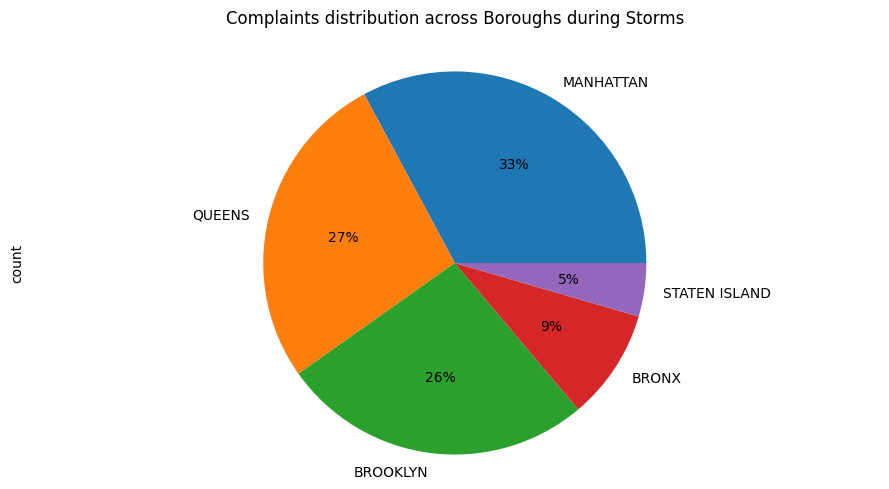

Borough
MANHATTAN        313
QUEENS           257
BROOKLYN         251
BRONX             89
STATEN ISLAND     43
Name: count, dtype: int64

In [147]:
df_storm = df_storm[df_storm['Borough'] != 'Unspecified']
df_storm['Borough'].value_counts().plot(kind = 'pie', 
                                      autopct = '%1.0f%%', 
                                      figsize = (9,5))
plt.axis('equal')
plt.title('Complaints distribution across Boroughs during Storms\n')
plt.tight_layout()
plt.show()
df_storm['Borough'].value_counts()

<Axes: title={'center': 'Most Frequent Complaints during Storm'}, xlabel='Complaint Type'>

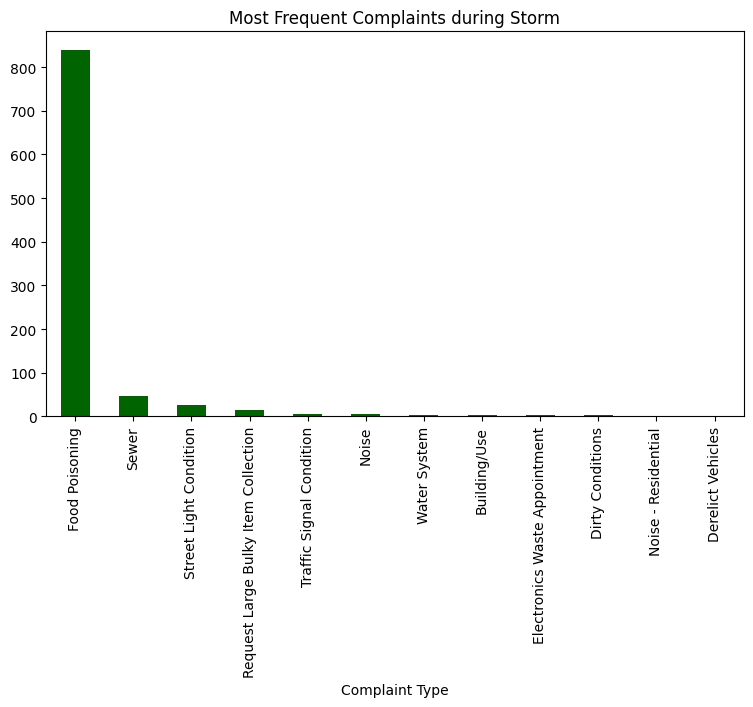

In [148]:
(df_storm['Complaint Type'].value_counts()).head(15).plot(kind = 'bar',
                                                        figsize = (9,5),
                                                        color = "darkgreen",
                                                        title = 'Most Frequent Complaints during Storm')

In [149]:
df_storm[df_storm["Complaint Type"] == "Food Poisoning"].head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Location,Resolution_Time,Day of Week,Day of Month,Month,Year,Storm_Borough,BEGIN_TIME,EVENT_TYPE,matched_borough
809818,61660384,2024-06-30 00:00:00,2024-07-09 00:00:01,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,1 or 2,Other (Explain Below),10467.0,847 PELHAM PARKWAY,...,"(40.85797266650935, -73.86243766028515)",9,6,30,6,2024,QUEENS CO.,1600.0,Thunderstorm Wind,QUEENS
848738,61608843,2024-06-26 00:00:00,2024-06-26 14:16:50,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,1 or 2,Restaurant/Bar/Deli/Bakery,10027.0,511 WEST 125 STREET,...,"(40.8136754764813, -73.95650053779502)",0,2,26,6,2024,QUEENS CO.,1955.0,Thunderstorm Wind,QUEENS
848739,61608843,2024-06-26 00:00:00,2024-06-26 14:16:50,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,1 or 2,Restaurant/Bar/Deli/Bakery,10027.0,511 WEST 125 STREET,...,"(40.8136754764813, -73.95650053779502)",0,2,26,6,2024,QUEENS CO.,2000.0,Thunderstorm Wind,QUEENS
848740,61614462,2024-06-26 00:00:00,2024-06-26 11:29:04,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,1 or 2,Restaurant/Bar/Deli/Bakery,10033.0,592 FORT WASHINGTON AVENUE,...,"(40.85464503592503, -73.93702230049381)",0,2,26,6,2024,QUEENS CO.,1955.0,Thunderstorm Wind,QUEENS
848741,61614462,2024-06-26 00:00:00,2024-06-26 11:29:04,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,1 or 2,Restaurant/Bar/Deli/Bakery,10033.0,592 FORT WASHINGTON AVENUE,...,"(40.85464503592503, -73.93702230049381)",0,2,26,6,2024,QUEENS CO.,2000.0,Thunderstorm Wind,QUEENS


##The most type of complains during storm are complaints regarding food poisoning.

<Axes: title={'center': '# Complaints vs Storm Type'}, xlabel='EVENT_TYPE'>

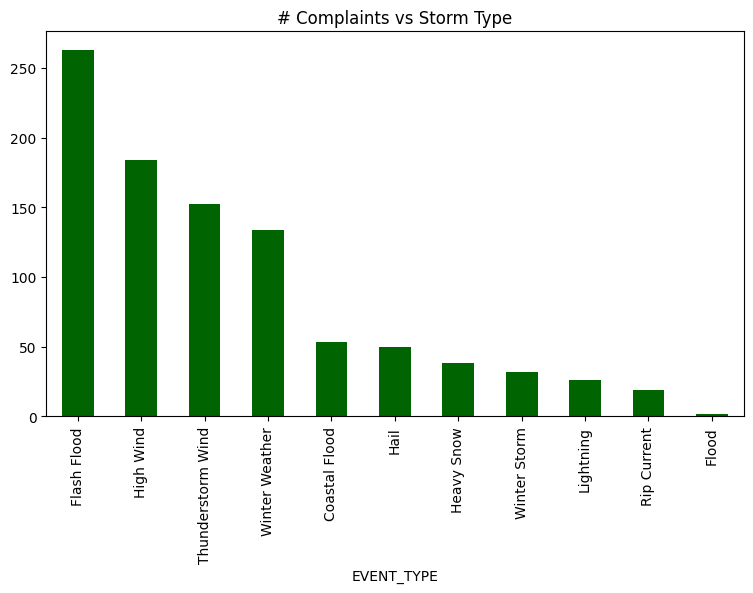

In [150]:
(df_storm['EVENT_TYPE'].value_counts()).head(25).plot(kind = 'bar',
                                                    figsize = (9,5),
                                                    color = "darkgreen",
                                                    title = '# Complaints vs Storm Type')

Most complaints are durimng flash floods

Avg Resolution Time (Days):  7.3913955928646375


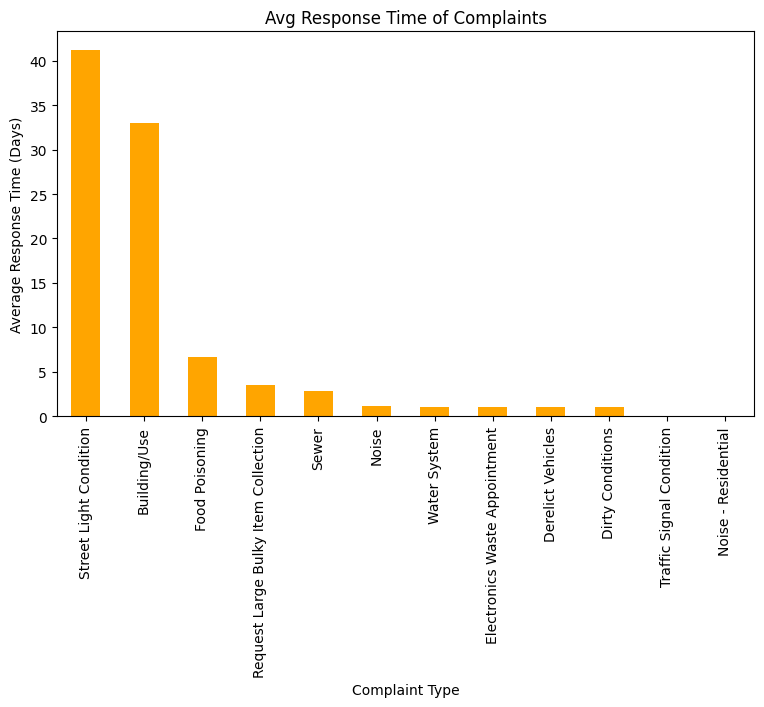

In [151]:
plt.figure()
print("Avg Resolution Time (Days): ", df_storm["Resolution_Time"].mean())
avgrstm_ct = df_storm.groupby('Complaint Type').Resolution_Time.mean()
avgrstm_ct = avgrstm_ct.sort_values(ascending=False)
top_complains = df_storm['Complaint Type'].value_counts()
avgrstm_ct = avgrstm_ct.loc[top_complains.index]
avgrstm_ct.sort_values(ascending=False).plot(kind = 'bar',
                  figsize = (9,5),
                  color = "orange",
                  title = 'Avg Response Time of Complaints')
plt.xlabel('Complaint Type')
plt.ylabel('Average Response Time (Days)')
plt.show()

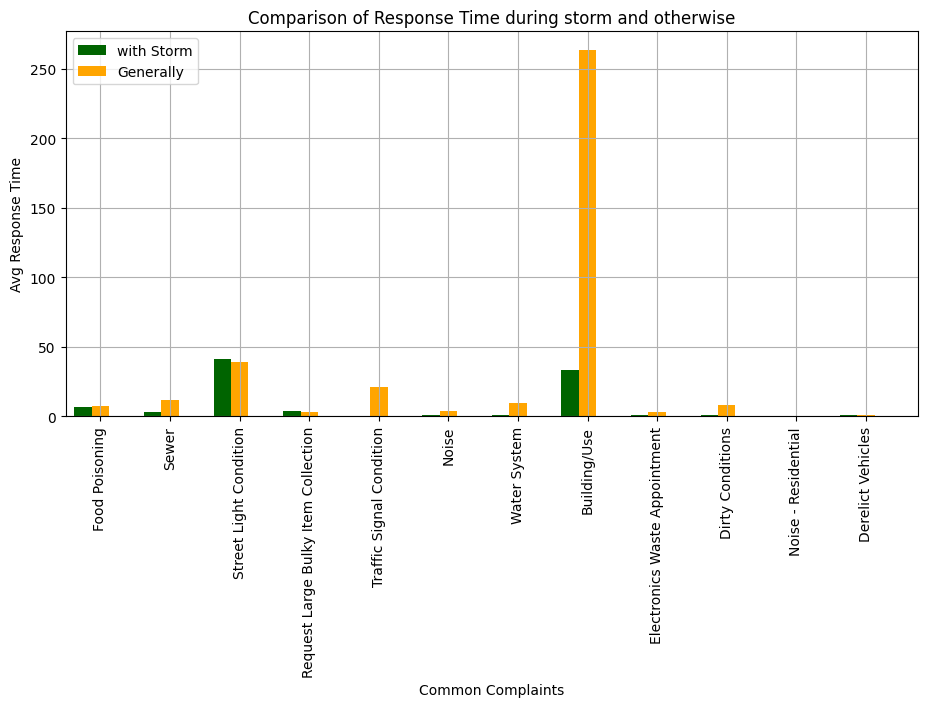

In [152]:
storm = (df_storm['Complaint Type'].value_counts()).head(15)
noStorm = df_normal[df_normal['Complaint Type'].isin(storm.index)]

var = df_storm.groupby('Complaint Type').Resolution_Time.mean()
frequent = df_storm['Complaint Type'].value_counts().head(15)
var = var.loc[frequent.index]

var1 = noStorm.groupby('Complaint Type').Resolution_Time.mean()
frequent1 = noStorm['Complaint Type'].value_counts().head(15)
var1 = var1.loc[frequent.index]

# Setting the positions and width for the bars
pos, width = list(range(len(var))), 0.25

# Plotting the bars
fig, ax = plt.subplots(figsize=(11,5))

plt.bar(pos, 
        var, 
        width,  
        color = 'darkgreen', 
        label = var.index[0]) 

plt.bar([p + width for p in pos], 
        var1,
        width,  
        color = 'orange', 
        label = var.index[1]) 

ax.set_ylabel('Avg Response Time')
ax.set_xlabel('Common Complaints')
ax.set_title('Comparison of Response Time during storm and otherwise')
ax.set_xticks([p + width for p in pos])
ax.set_xticklabels(var1.index)
plt.xlim(min(pos) - width, max(pos) + width * 4)
plt.xticks(rotation = 'vertical')
plt.legend(['with Storm', 'Generally'], loc = 'upper left')
plt.grid()